In [45]:
import pandas as pd

In [46]:
df1=pd.read_csv('Customers.csv')
df2=pd.read_csv('Products.csv')
df3=pd.read_csv('Transactions.csv')

In [47]:
print(df1.head(5))
print('*'*100)
print(df2.head(5))
print('*'*100)
print(df3.head(5))

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
****************************************************************************************************
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
****************************************************************************************************
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001    

In [48]:
print(df1.shape)
print(df2.shape)
print(df3.shape)

(200, 4)
(100, 4)
(1000, 7)


In [49]:
print(df1.isna().sum())

print(df2.isna().sum())

print(df3.isna().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [50]:
print(df1.info())
print(df2.info())
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

Customers:

Contains customer details with 200 rows and 4 columns.
Columns: CustomerID, CustomerName, Region, SignupDate.
Data type: All are object, but SignupDate should be converted to datetime.


Products:

Contains product details with 100 rows and 4 columns.
Columns: ProductID, ProductName, Category, Price.
Data type: Price is numeric (float64), and the rest are object.


Transactions:

Contains transaction details with 1000 rows and 7 columns.
Columns: TransactionID, CustomerID, ProductID, TransactionDate, Quantity, TotalValue, Price.
Data type: Numeric columns (Quantity, TotalValue, Price) are float64 or int64, while others are object. TransactionDate should be converted to datetime.

In [51]:
print(df1.isnull().sum())  # Check for missing values
print(df1.duplicated().sum())  # Check for duplicate rows


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
0


In [52]:
df1['SignupDate'] = pd.to_datetime(df1['SignupDate'])
df1.dtypes

CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object

<Axes: title={'center': 'Customers by Region'}, xlabel='Region'>

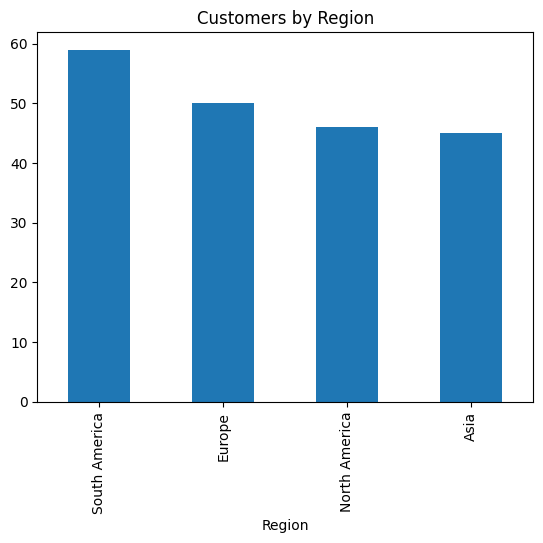

In [53]:
region_counts = df1['Region'].value_counts()
region_counts.plot(kind='bar', title='Customers by Region')


In [54]:
print(df2.isnull().sum())  # Check for missing values
print(df2.duplicated().sum())  # Check for duplicate rows


ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
0


<Axes: title={'center': 'Products by Category'}, xlabel='Category'>

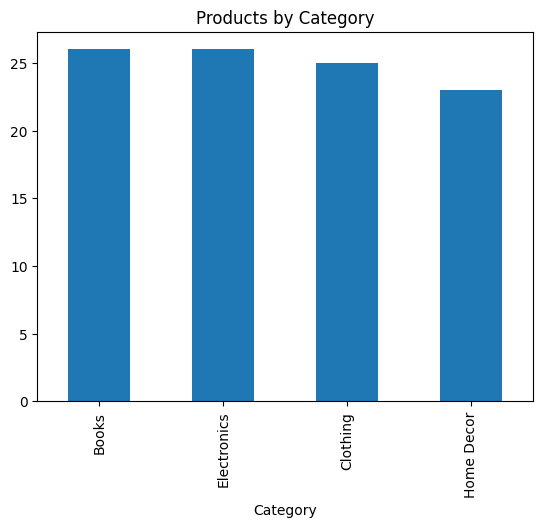

In [55]:
category_counts = df2['Category'].value_counts()
category_counts.plot(kind='bar', title='Products by Category')


In [56]:
print(df2['Price'].describe())


count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64


In [57]:
print(df3.isnull().sum())  
print(df3.duplicated().sum())  


TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64
0


In [58]:
df3['TransactionDate'] = pd.to_datetime(df3['TransactionDate'])
df3.dtypes

TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object

<Axes: title={'center': 'Monthly Revenue'}, xlabel='Month'>

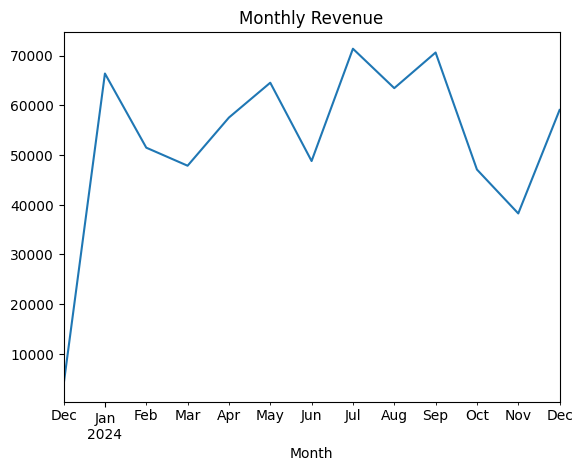

In [59]:
df3['Month'] = df3['TransactionDate'].dt.to_period('M')
monthly_revenue = df3.groupby('Month')['TotalValue'].sum()
monthly_revenue.plot(kind='line', title='Monthly Revenue')


In [60]:
top_products = df3.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)


ProductID
P054    46
P059    46
P029    45
P048    43
P057    43
P061    43
P079    43
P062    39
P020    38
P028    38
Name: Quantity, dtype: int64


<Axes: title={'center': 'Revenue by Region'}, xlabel='Region'>

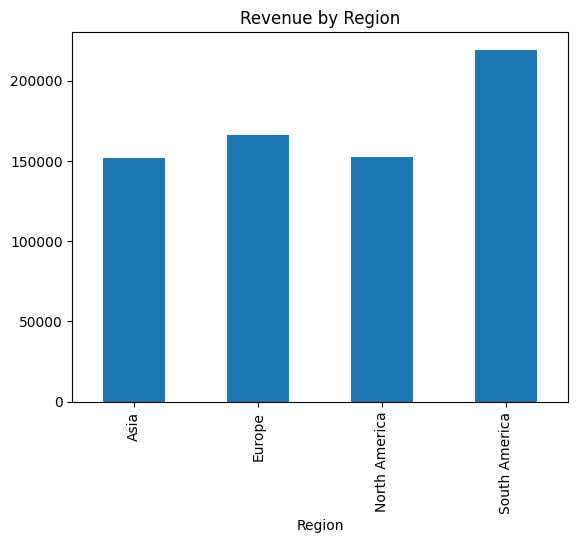

In [63]:
merged_data = df3.merge(df1, on='CustomerID').merge(df2, on='ProductID')
revenue_by_region = merged_data.groupby('Region')['TotalValue'].sum()
revenue_by_region.plot(kind='bar', title='Revenue by Region')


In [64]:
total_revenue = df3['TotalValue'].sum()
avg_transaction_value = df3['TotalValue'].mean()
avg_quantity_sold = df3['Quantity'].mean()
print(total_revenue, avg_transaction_value, avg_quantity_sold)


689995.56 689.9955600000001 2.537


In [65]:
merged_data = df3.merge(df1, on='CustomerID').merge(df2, on='ProductID')


<Axes: title={'center': 'Revenue by Region'}, xlabel='Region'>

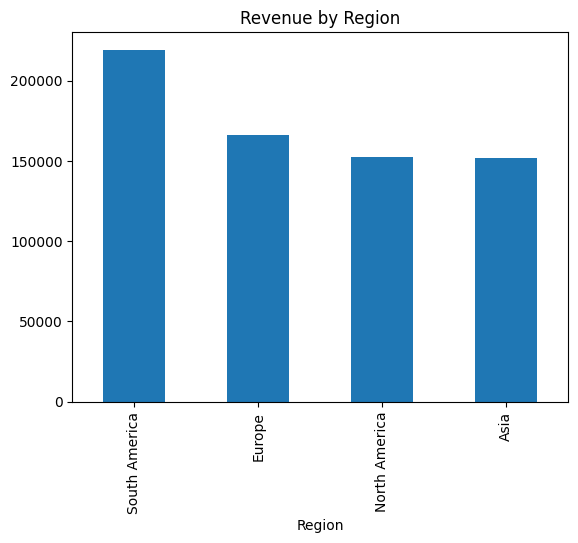

In [66]:
revenue_by_region = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
revenue_by_region.plot(kind='bar', title='Revenue by Region')


In [67]:
top_customers = merged_data.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print(top_customers)


CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


<Axes: title={'center': 'Monthly Revenue Trends'}, xlabel='Month'>

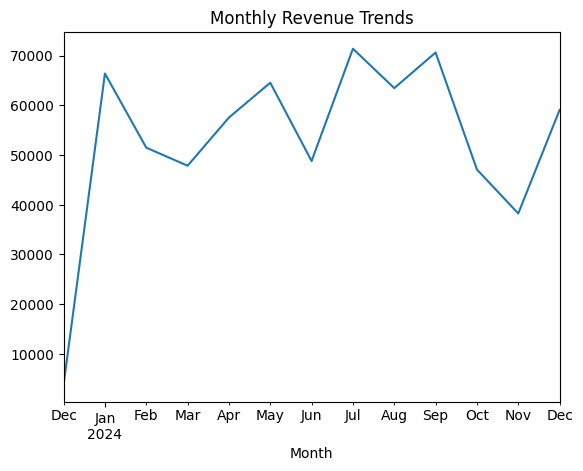

In [68]:
merged_data['Month'] = merged_data['TransactionDate'].dt.to_period('M')
monthly_trends = merged_data.groupby('Month')['TotalValue'].sum()
monthly_trends.plot(kind='line', title='Monthly Revenue Trends')


<Axes: title={'center': 'Revenue by Product Category'}, xlabel='Category'>

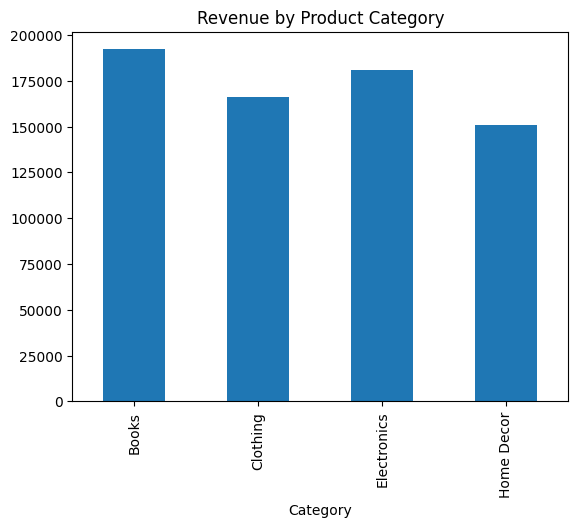

In [69]:
category_revenue = merged_data.groupby('Category')['TotalValue'].sum()
category_revenue.plot(kind='bar', title='Revenue by Product Category')
